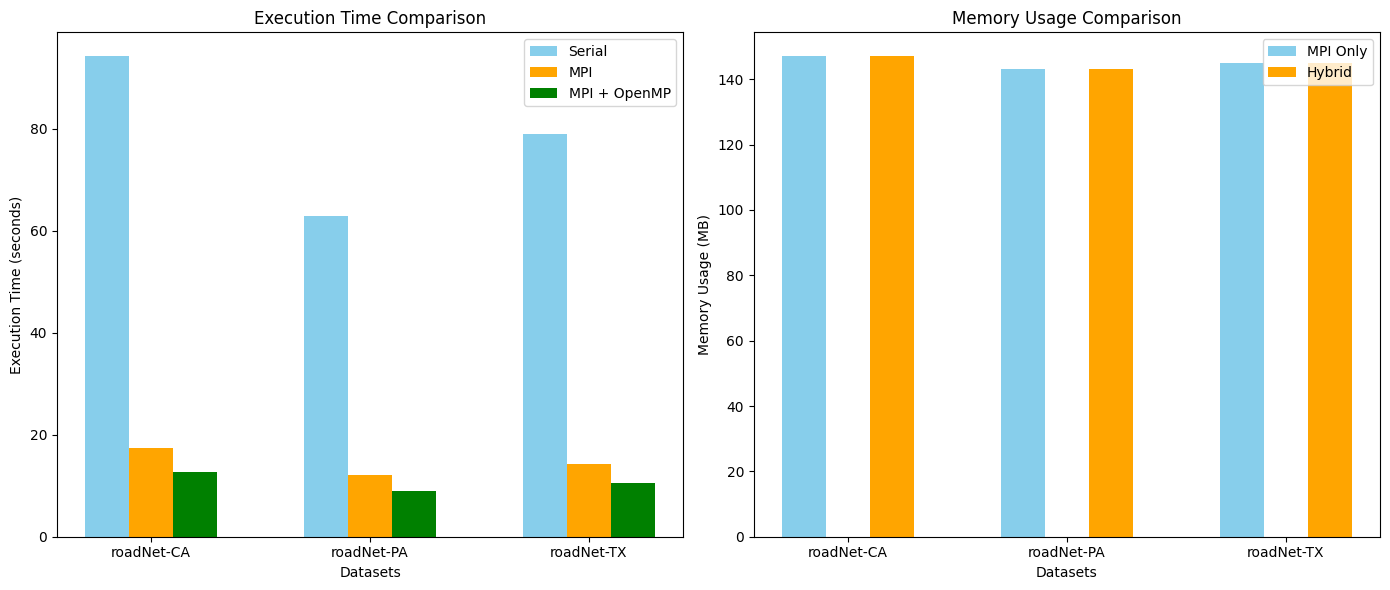

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data for execution times
datasets = ['roadNet-CA', 'roadNet-PA', 'roadNet-TX']
serial_times = [94.22, 62.84, 79.01]
mpi_times = [17.35, 12.03, 14.26]
mpi_openmp_times = [12.71, 8.90, 10.54]

# Data for memory usage
mpi_memory = [147, 143, 145]
hybrid_memory = [147, 143, 145]

# Create the figure for Execution Time and Memory Usage plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot execution time
x = np.arange(len(datasets))
width = 0.2

ax1.bar(x - width, serial_times, width, label='Serial', color='skyblue')
ax1.bar(x, mpi_times, width, label='MPI', color='orange')
ax1.bar(x + width, mpi_openmp_times, width, label='MPI + OpenMP', color='green')

ax1.set_xlabel('Datasets')
ax1.set_ylabel('Execution Time (seconds)')
ax1.set_title('Execution Time Comparison')
ax1.set_xticks(x)
ax1.set_xticklabels(datasets)
ax1.legend()

# Plot memory usage
ax2.bar(x - width, mpi_memory, width, label='MPI Only', color='skyblue')
ax2.bar(x + width, hybrid_memory, width, label='Hybrid', color='orange')

ax2.set_xlabel('Datasets')
ax2.set_ylabel('Memory Usage (MB)')
ax2.set_title('Memory Usage Comparison')
ax2.set_xticks(x)
ax2.set_xticklabels(datasets)
ax2.legend()

plt.tight_layout()
plt.show()


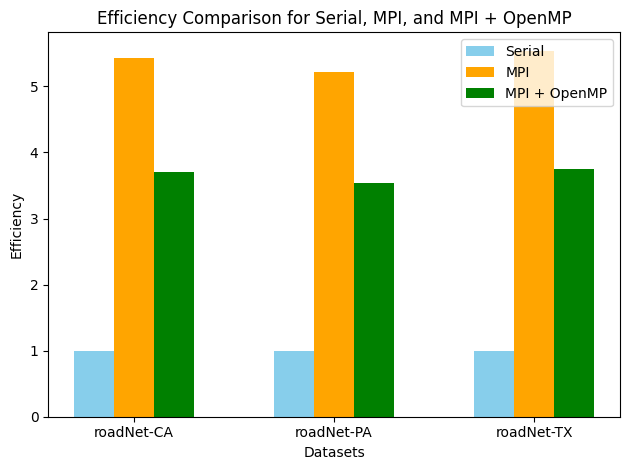

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Data for execution times
datasets = ['roadNet-CA', 'roadNet-PA', 'roadNet-TX']
serial_times = [94.22, 62.84, 79.01]
mpi_times = [17.35, 12.03, 14.26]
mpi_openmp_times = [12.71, 8.90, 10.54]

# Number of processors (assuming MPI uses 1 processor and MPI + OpenMP uses 2 threads)
num_processors_mpi = 1
num_processors_mpi_openmp = 2

# Calculate speedup and efficiency for each approach
speedup_serial = [1] * len(serial_times)  # Serial is the baseline
efficiency_serial = speedup_serial  # Efficiency for serial is always 1

speedup_mpi = [serial / mpi for serial, mpi in zip(serial_times, mpi_times)]
efficiency_mpi = [speedup / num_processors_mpi for speedup in speedup_mpi]

speedup_mpi_openmp = [serial / mpi_openmp for serial, mpi_openmp in zip(serial_times, mpi_openmp_times)]
efficiency_mpi_openmp = [speedup / num_processors_mpi_openmp for speedup in speedup_mpi_openmp]

# Create the figure for Efficiency plot
x = np.arange(len(datasets))
width = 0.2

# Plot efficiency for all three approaches
plt.bar(x - width, efficiency_serial, width, label='Serial', color='skyblue')
plt.bar(x, efficiency_mpi, width, label='MPI', color='orange')
plt.bar(x + width, efficiency_mpi_openmp, width, label='MPI + OpenMP', color='green')

plt.xlabel('Datasets')
plt.ylabel('Efficiency')
plt.title('Efficiency Comparison for Serial, MPI, and MPI + OpenMP')
plt.xticks(x, datasets)
plt.legend()

plt.tight_layout()
plt.show()
